In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import signal
from IPython import display
from sklearn.metrics import mean_squared_error

#Signal constants
m = 0
T = 2

#Plotting constants
TRANGE = 2
R = 1000

In [3]:
def r(t):
    if t < 0:
        return 0
    else:
        return t

def x(t):
    return r(t) - 2*r(t-1) + r(t-2)

#Fourier coeffecients function
def ak(k):
    if k == 0:
        return 0.5
    else:
        return ((-1)**(k) -1)/((cmath.pi**2) * k**2) 
        
#Fourier series function
def xm(t):
    sum = 0
    for i in range(2*m + 1):
        k = i - m
        sum += ak(k)*cmath.exp((2j*cmath.pi*k*t)/T)
    return sum 

#***************************************************

#makes time domain array from function
def to_array(f):
    x = np.array([])
    y = np.array([])
    for i in range(int(TRANGE*R + 1)):
        t = i/R 
        y = np.append(y, (f(t)))
        x = np.append(x, t)
    return x, y

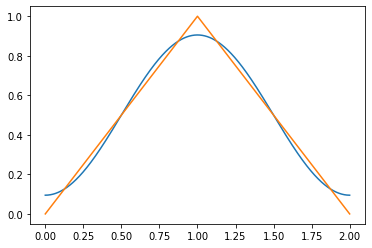

N = 1
Error = 0.003628162993403082


<Figure size 432x288 with 0 Axes>

In [4]:
pp = 1
plt.figure()
while pp > 0.01:
    m += 1
    t, y = to_array(xm)
    plt.plot(t, y)
    t, y2 = to_array(x)
    plt.plot(t, y2)

    mse = mean_squared_error(y.real, y2)
    pp = 3*mse

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
print("N = {}".format(m))
print("Error = {}".format(pp))